# Question A 

# Does this require ML supervised, unsupervised, or semi supervised learning and why? Which ML task (classification, clustering, regression analysis or any other) is the best in this case and why?


### Answer:

With the context, the goal of this task is to predict the medical expenses based on different features or variables of the payees as provided. This means:- 

- We have a target variable **(medical expenses)** that we want to predict.

- We have a labeled dataset, meaning we know the outcome variable (in this case, medical expenses) for our input data.

This analysis means that this a **Supervised Learning problem.**

So in order to solve this problem, we would implement supervised learning, the algorithm learns from labeled training data, where the input features (predictors) and their corresponding target variable (in this case, the medical cost) are known. The goal is to learn a mapping from the input features to the target variable, so that the algorithm can make predictions on unseen data.

**Regarding the specific task:**

Since we're predicting a continuous numerical value (medical expenses), the best task for this case would be Regression Analysis.

**Note**

Regression analysis is a statistical technique used to demonstrate the relationship between two or more variables. 



# Import libraries and packages

In [1]:
# Reduce warnings in notebook for cleaner output

import warnings
warnings.filterwarnings('ignore')

In [2]:
#We need some of the python libraries to be able to work with the data for analysis and modelling, 
#these libraries including data exploration and visualization. We will use pandas, numpy,
#matplotlib, seaborn, and sklearn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#We will use the inline backend to generate the plots within the browser
%matplotlib inline

#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



# Load data from CSV

In [10]:
#We will use the python library pandas to read the csv file into a pandas dataframe

med_insure_df = pd.read_csv('/Users/kehindeoabe/Desktop/ML_Model_Insurance/Datasets/insurance.csv')

# Question B - Explore your data and document your observation.
# Exploratory Data Analysis(EDA)

## Data Exploration and Preprocessing
 This is done by exploring the dataset to understand its structure and characteristics. This may involve checking for missing values, examining the distribution of variables, and identifying any outliers. It may also include converting categorical variables into numerical representations (e.g., one-hot encoding) for prediction.

### Explore your data and document your observation. 

In [5]:
#We'll call the dataframe to get also the top and bottom five rows of the dataframe
med_insure_df

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Exploration Observations:

**Data Structure:** The dataset consists of the following columns:

`age:` Age of the insured.

`sex:` Gender of the insured (male/female).

`bmi:` Body Mass Index of the insured.

`children:` Number of children/dependents covered by the insurance.

`smoker:` Whether the insured is a smoker (yes/no).

`region:` Region where the insured resides.

`medicalCost:` Medical expenses of the insured.


- Each row represents a separate individual, and there are a total of 1338 rows in the actual dataset.
- The 'age', 'bmi', 'children', and 'medicalCost' columns are numerical, while 'sex', 'smoker', and 'region' are categorical.
- The 'medicalCost' column represents the target variable that we want to predict using the other features.

**Note:** We would still need to convert some categorical data to numerical, and `medicalCost` is in `dollars($)`



In [5]:
#To confirm the shape of our dataset, We will use the shape function to check the number of rows and columns in the dataframe

med_insure_df.shape

(1338, 7)

**Observation**
It was discovered that there are 1338 rows and 7 columns in the dataset provided.

In [6]:
#To further check the structure of the dataset, including the data types of the columns.

med_insure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Check for missing values in the dataset

med_insure_df.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64

From the analysis above, it was discovered that there are no missing value present in the dataset. All columns are fully populated.

In [8]:
#There are different variables to check for their unique values. We will use the unique() method to check the unique values in each column.

#check differnent unique values in each column 

med_insure_df["region"].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
#The unique value will be checked for some of the other variables too.

med_insure_df["sex"].unique()

array(['female', 'male'], dtype=object)

In [10]:
#The unique value for the smoker column. 
med_insure_df["smoker"].unique()

array(['yes', 'no'], dtype=object)

Check for duplicate rows in the dataset and drop them if any is found in the dataset. This is to ensure that we are working with a clean dataset, and 
that we are not working with duplicate rows in the dataset, which can affect our analysis and modelling.

In [11]:
#Check for duplicate rows in the dataset and drop them if any is found in the dataset. This is to ensure that we are working with a clean dataset, and 
#that we are not working with duplicate rows in the dataset, which can affect our analysis and modelling.

duplicate_rows = med_insure_df[med_insure_df.duplicated()]

duplicate_rows

,age,sex,bmi,children,smoker,region,medicalCost
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
#Drop the duplicate rows in the dataset

med_insure_df = med_insure_df.drop_duplicates()

In [13]:
#Check the shape of the dataset after dropping the duplicate rows

med_insure_df.shape

(1337, 7)

The duplicated value has been dropped now. The total number of rows is now `1337` compared to the previous number, which was `1338`

In [14]:
#Recheck for duplicate rows in the dataset. This is to ensure that the duplicate rows have been dropped.

med_insure_df.duplicated().sum()

0

There are no duplicated value in the datset

In [15]:
#Check the number of unique values in each column

med_insure_df.nunique()

age              47
sex               2
bmi             548
children          6
smoker            2
region            4
medicalCost    1337
dtype: int64

In [16]:
#We will use the describe function to get a statistical summary of all numerical columns in the dataframe. 
#Convert to 3 significant figures, then transpose the dataframe for better readability.

med_insure_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.22,14.04,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.66,6.10,15.96,26.29,30.40,34.70,53.13
children,1337.0,1.10,1.21,0.00,0.00,1.00,2.00,5.00
medicalCost,1337.0,13279.12,12110.36,1121.87,4746.34,9386.16,16657.72,63770.43


**After the above data analysis, here is the summary statistics**

**Observation**
From the above describe function used, the total number of the numerical columns are correct, which is `1337` rows.

- The mean average for the variables is calculated, also including other statistical findings like the percentile, minimum and maximum value.

- The age of individuals ranges from `18 to 64 years.` The average age is approximately `39 years.`

- The BMI ranges from about `15.96 to 53.13` with an average value of around `30.66.` The average BMI suggests that many individuals are overweight, considering a BMI of 25 to 30 is considered overweight.

- Individuals have between `0 to 5 children` with an `average` of about `1 child`

- The minimum medicalCost is `1,121.87` and maximum `63,770.43` with an `average cost of 13279.12.`

In [17]:
med_insure_df

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The sex and smoker variable need to be converted from categorical variable to numerical variable. Converting categorical variables to numerical variables in machine learning is necessary for algorithm compatibility, improved feature representation, preserving ordinal relationships, expanding the feature space, simplifying computations, and enhancing model interpretability for more effective analysis and predictions.

To convert the 'sex' and 'smoker' columns from categorical variables to numerical variables, different technique can be used, but I will use the mapping function. It uses the `map()` method on the `'sex'` column and provides a dictionary that maps the values `'male' to 0 and 'female' to 1`, it applies same method to the smoker's column too.

In [18]:
#define a function that takes athe categorical columns, sex and smoker, and map them to numerical values. 
#For sex, Male = 0, Female = 1. For smoker, No = 0, Yes = 1.

def map_columns(df):
    # Mapping
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})
    df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
    return df


In [19]:
#Assign a new variable and call the function to map the categorical columns to numerical values
med_insure_df = map_columns(med_insure_df)
med_insure_df


,age,sex,bmi,children,smoker,region,medicalCost
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


**Explanation and Observation**
The code above defines a function called map_columns that takes a DataFrame (df) as an input parameter.

The function starts by mapping the values in the 'sex' column of the DataFrame. It uses the `map()` method on the `'sex'` column and provides a dictionary that maps the values `'male' to 0 and 'female' to 1`. This operation replaces the original values in the `'sex'` column with the corresponding mapped values.

Similarly, the function then maps the values in the `'smoker' column.` It uses the `map()` method on the `'smoker'` column and provides a dictionary that maps the values `'yes' to 1 and 'no' to 0.` This operation replaces the original values in the `'smoker'` column with the corresponding mapped values.

Finally, the function returns the head of the modified DataFrame `(df)`.


To use this function, the original DataFrame `(med_insure_df)` as an argument, like this:

`med_insure_df = map_columns(med_insure_df)`. The function will perform the mapping operations on the 'sex' and 'smoker' columns of med_insure_df, modify the DataFrame, and store the result in the med_insure_df variable, then finally print the `med_insure_df`



**Note**- There other methods that can be used to encode the this columns, like the LabelEnoding() function but a limitation of using label encoding is that it assigns a unique number (starting from 0) to each class of data. However, this approach may generate priority issues during the model training process. For instance, a label with a higher numerical value may be mistakenly interpreted as having higher priority or importance compared to a label with a lower numerical value. This can potentially introduce bias or incorrect assumptions in the model's learning process.

In [20]:
#Write a function that round the bmi and medicalCost columns to 2 significant figures for easy readability.

def round_columns(df):
    # Rounding
    df['bmi'] = df['bmi'].round(2)
    df['medicalCost'] = df['medicalCost'].round(2)
    return df


In [21]:
#Call the function to round the bmi and medicalCost columns.
med_insure_df = round_columns(med_insure_df)
med_insure_df

,age,sex,bmi,children,smoker,region,medicalCost
0,19,1,27.90,0,1,southwest,16884.92
1,18,0,33.77,1,0,southeast,1725.55
2,28,0,33.00,3,0,southeast,4449.46
3,33,0,22.70,0,0,northwest,21984.47
4,32,0,28.88,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,northwest,10600.55
1334,18,1,31.92,0,0,northeast,2205.98
1335,18,1,36.85,0,0,southeast,1629.83
1336,21,1,25.80,0,0,southwest,2007.94


In [22]:
#Checking the type of the columns in the dataframe, just to be sure that the columns are of the right data type.

med_insure_df.dtypes

age              int64
sex              int64
bmi            float64
children         int64
smoker           int64
region          object
medicalCost    float64
dtype: object

**Observation**: These are the correct types expected from our dataset.

# Data Visualization

### Bivariate Analysis

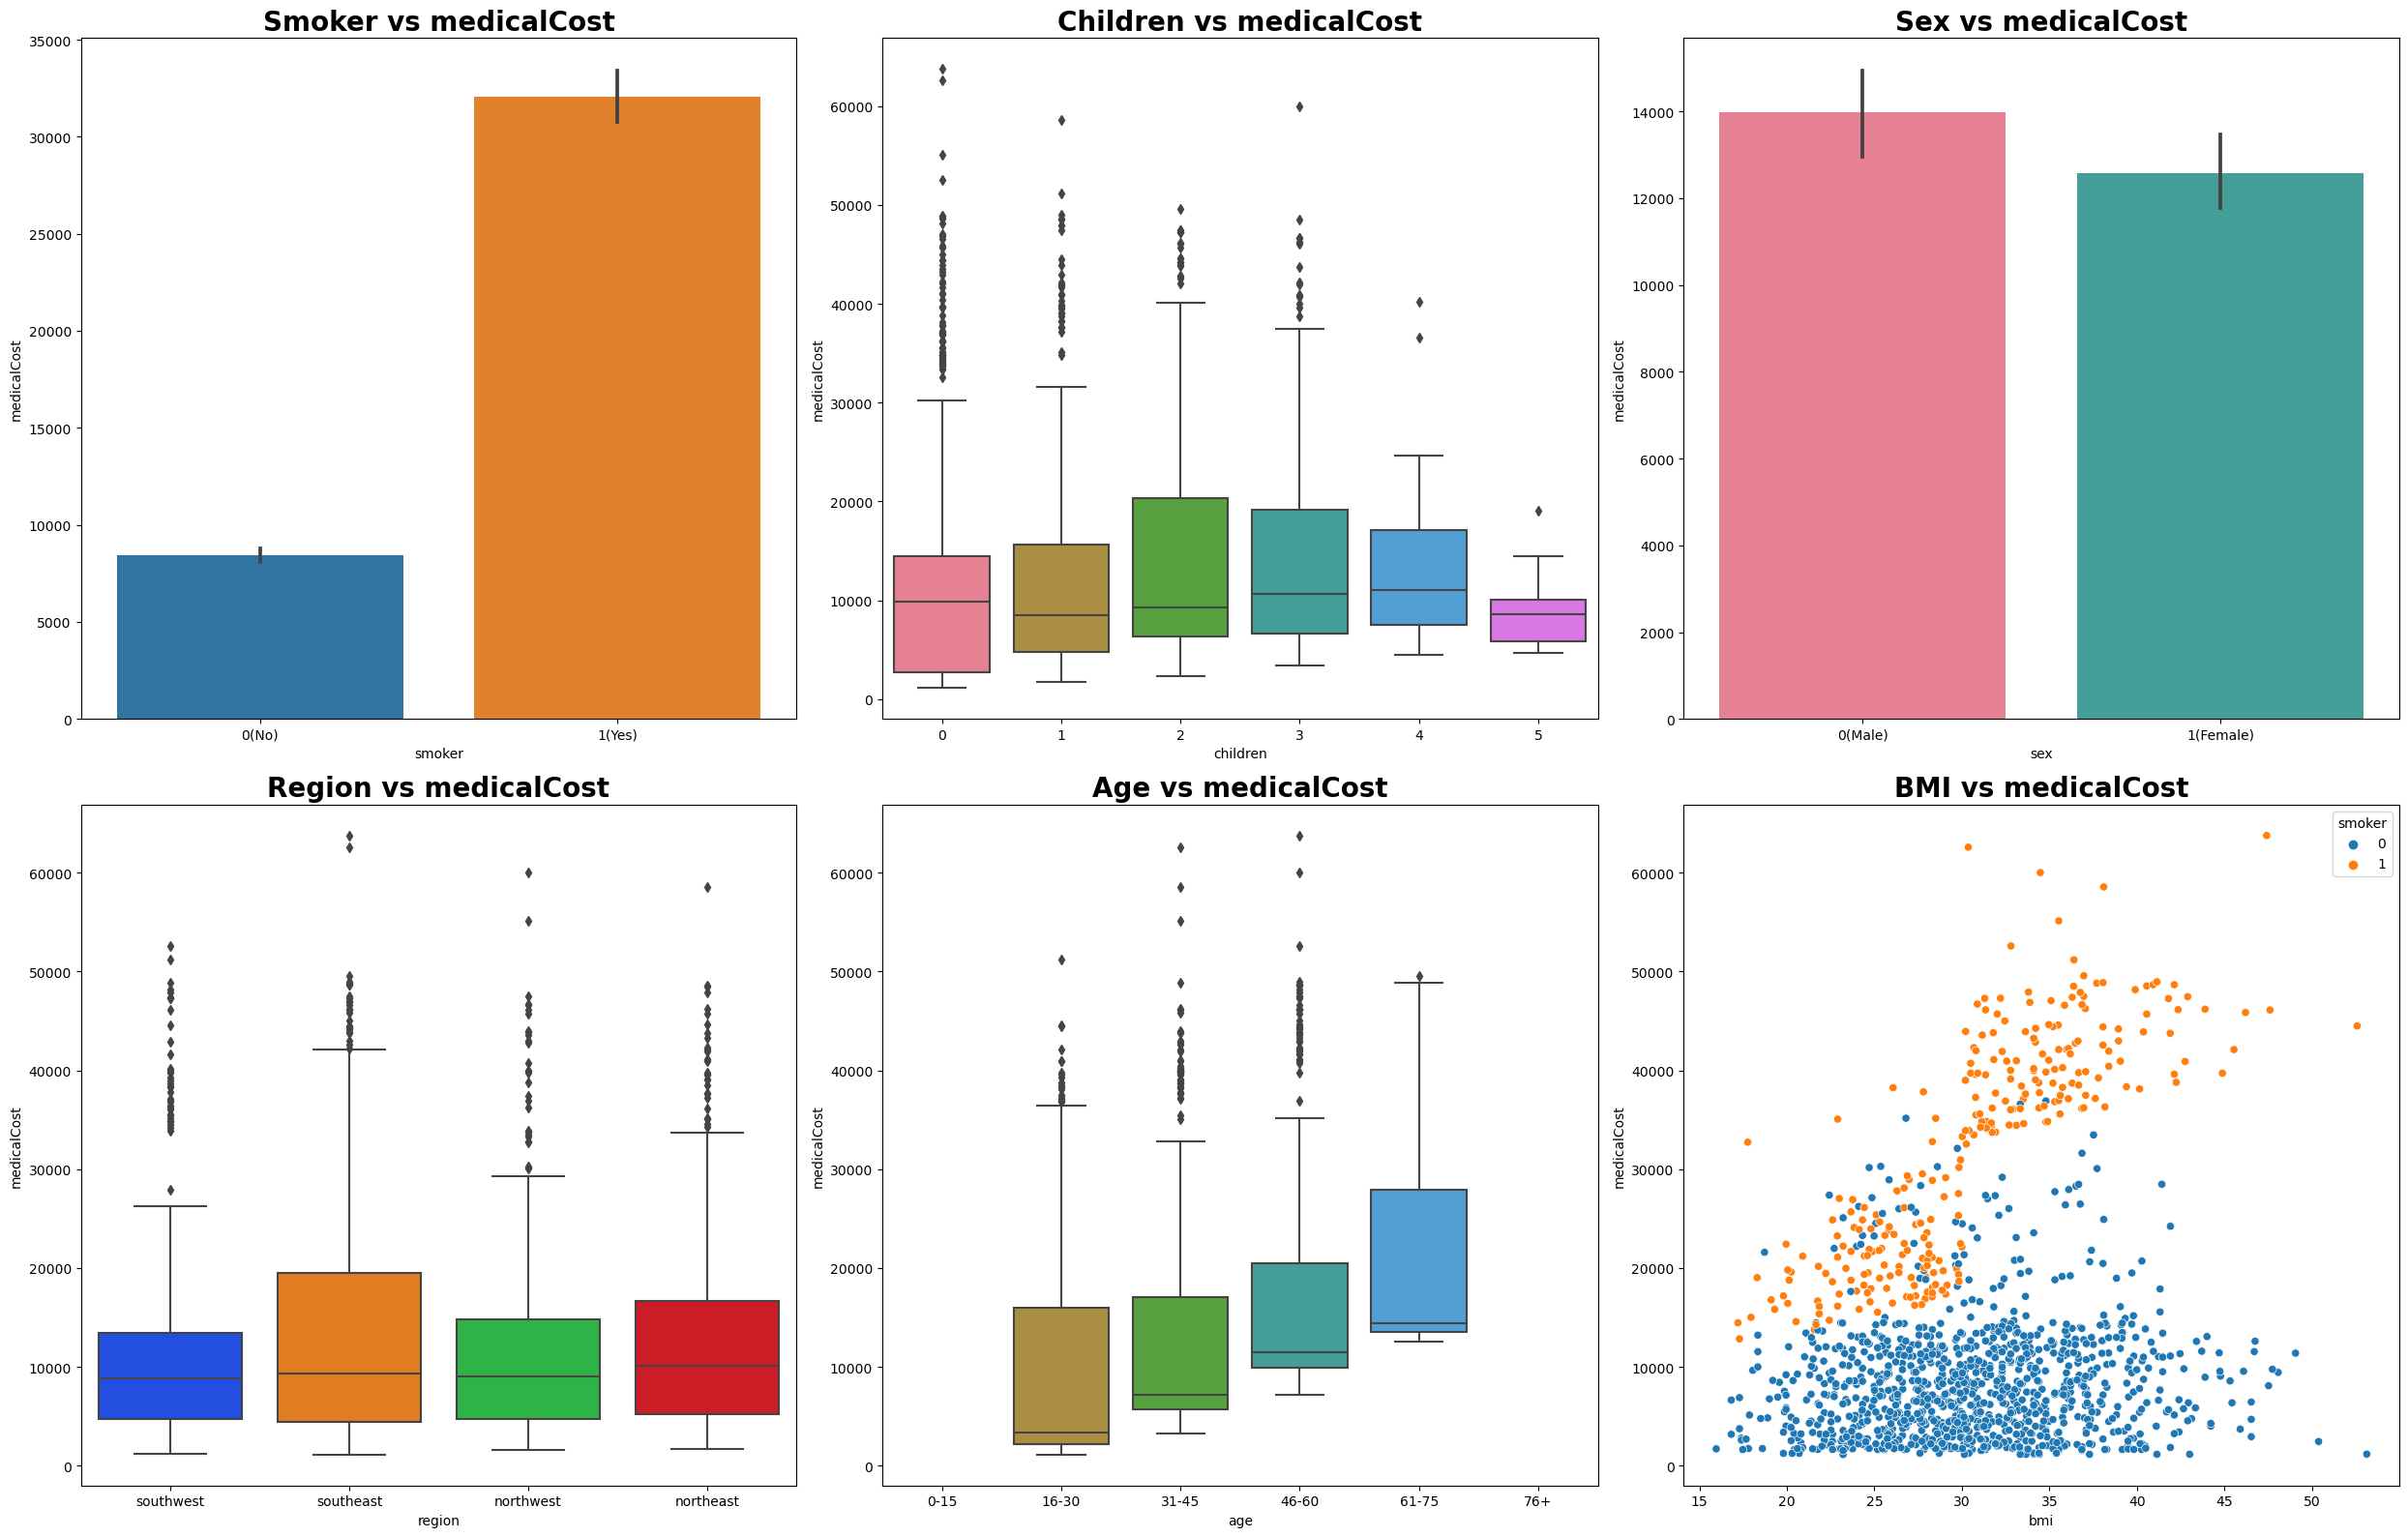

In [23]:
plt.figure(figsize=(25, 16))

# Subplot 1: Smoker vs medicalCost
plt.subplot(2, 3, 1)
sns.barplot(x='smoker', y='medicalCost', data=med_insure_df)
# Set tick labels
plt.xticks(ticks=[0, 1], labels=['0(No)', '1(Yes)'], fontsize=10)
plt.title('Smoker vs medicalCost', fontweight="bold", size=20)

# Subplot 2: Children vs medicalCost
plt.subplot(2, 3, 2)
sns.boxplot(x='children', y='medicalCost', data=med_insure_df, palette="husl")
plt.title('Children vs medicalCost', fontweight="bold", size=20)

# Subplot 3: Sex vs medicalCost
plt.subplot(2, 3, 3)
sns.barplot(data=med_insure_df, x='sex', y='medicalCost', palette='husl')

# Set tick labels
plt.xticks(ticks=[0, 1], labels=['0(Male)', '1(Female)'], fontsize=10)

plt.title('Sex vs medicalCost', fontweight="bold", size=20)

# Subplot 4: Region vs medicalCost
plt.subplot(2, 3, 4)
sns.boxplot(x='region', y='medicalCost', data=med_insure_df, palette="bright")
plt.title('Region vs medicalCost', fontweight="bold", size=20)

# Subplot 5: Age vs medicalCost
# Define the age groups
age_bins = [0, 15, 30, 45, 60, 75, float('inf')]
age_labels = ['0-15', '16-30', '31-45', '46-60', '61-75', '76+']

# Subplot 5: Age vs medicalCost
plt.subplot(2, 3, 5)
sns.boxplot(x=pd.cut(med_insure_df['age'], bins=age_bins, labels=age_labels), y='medicalCost', data=med_insure_df, palette='husl')
plt.title('Age vs medicalCost', fontweight="bold", size=20)

# Subplot 6: BMI vs medicalCost 
plt.subplot(2, 3, 6)
sns.scatterplot(x = 'bmi', y = 'medicalCost', data = med_insure_df, hue = 'smoker')    
plt.title('BMI vs medicalCost', fontweight="bold", size=20)

plt.tight_layout()
plt.show()

**Observation**

This code above plot multiple boxplots to compare different variables with 'medicalCost'.

**Subplot 1: Smoker vs. medicalCost**
Smokers tend to have an outstanding higher medical costs compared to non-smokers, as indicated by the chat. This may mean that smokers get sick more than the non-smokers, thereby incuring more medical cost to treat the dieseases or sickness. This analysis will help the insurance to know how much is being used.

**Subplot 2: Children vs. medicalCost**
There is a general trend of increasing medical costs with the number of children.
Individuals with more children tend to have slightly higher medical costs, as indicated by the higher medians for higher numbers of children.

**Subplot 3: Sex vs. medicalCost**
There is some variation in medical costs between sexes, with males tending to have slightly higher medical costs compared to females.

**Subplot 4: Region vs. medicalCost**
The medical costs show some variation across different regions, with 'region' being a potential predictor of medical costs.
Individuals from certain regions may have higher or lower median medical costs compared to others.

**Subplot 5: Age vs. medicalCost**
There is a general upward trend in medical costs with increasing age. The boxplot reveals that as individuals' age increases, there is a general trend of higher medical costs, particularly from the age group 46-60 and onward. The boxes are positioned in ascending order on the x-axis, indicating the increasing age groups from left to right. This visualization allows for easy comparison between different age groups and their corresponding medical cost distributions. It emphasizes the potential impact of age on medical expenses and highlights the importance of considering age as a predictor in models aiming to estimate medical costs accurately.

Additionally, the boxplot provides insights into the distribution of medical costs within each age group. The vertical spread of the boxes reflects the variability of medical costs within each age range. The boxes' median lines indicate the central tendencies of medical costs for each age group.

**Subplot 6: BMI vs. medicalCost**
The scatter plot reveals a spread of data points with no distinct linear pattern, suggesting a relatively weak linear relationship between BMI and medical costs. However, there appears to be a general trend where higher BMI values are associated with slightly higher medical costs, indicated by a gradual upward direction in the data points.
The plot's scattered distribution implies that other factors besides BMI may also contribute to medical costs significantly. Further analysis, such as regression modeling or correlation analysis, may be necessary to quantify the strength of the relationship between BMI and medical costs accurately. Additionally, examining potential outliers or influential points could provide additional insights into the relationship. 

### More plots on Bivariate Analysis to compare differences

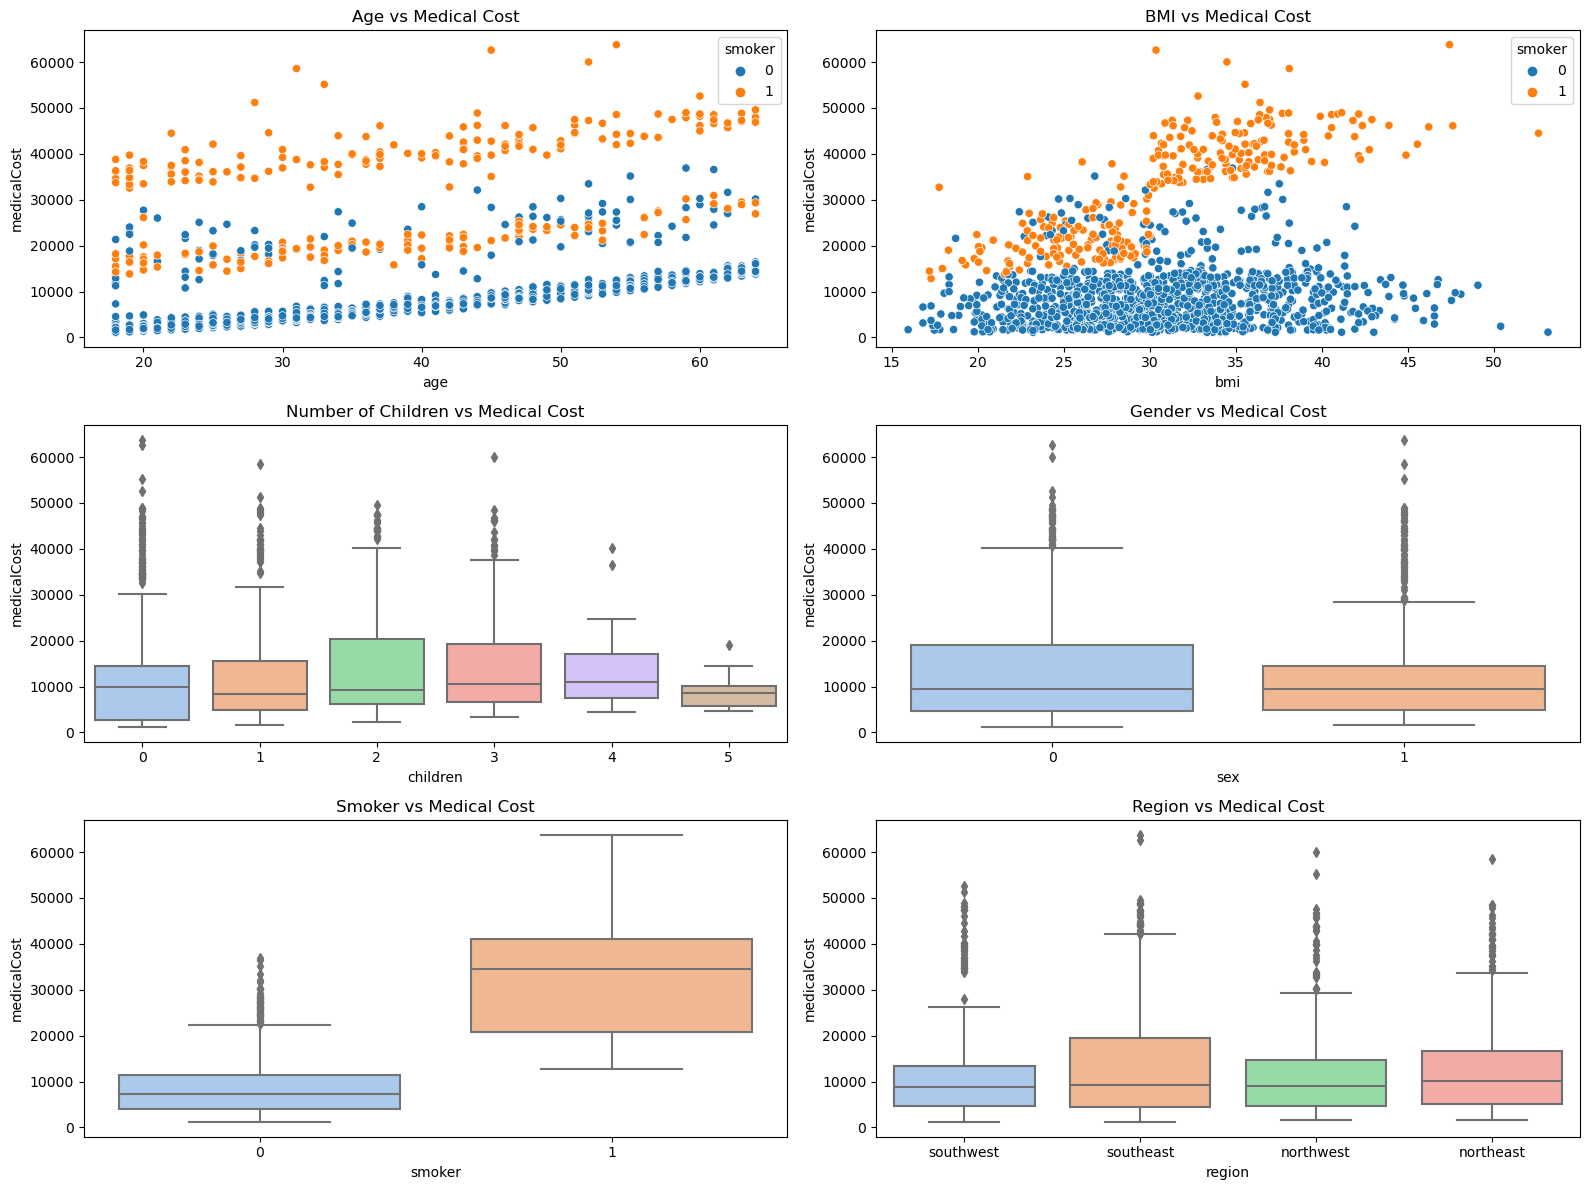

In [24]:
# Bivariate Analysis: Analyzing relationship between each feature and the target variable (medicalCost)

fig, axes = plt.subplots(3, 2, figsize = (16, 12))

# Age vs Medical Cost
sns.scatterplot(x = 'age', y = 'medicalCost', data = med_insure_df, hue ='smoker', ax = axes[0, 0])
axes[0, 0].set_title('Age vs Medical Cost')

# BMI vs Medical Cost
sns.scatterplot(x = 'bmi', y = 'medicalCost', data = med_insure_df, hue = 'smoker', ax = axes[0, 1])
axes[0, 1].set_title('BMI vs Medical Cost')

# Number of Children vs Medical Cost
sns.boxplot(x ='children', y = 'medicalCost', data = med_insure_df, ax = axes[1, 0], palette = 'pastel')
axes[1, 0].set_title('Number of Children vs Medical Cost')

# Gender vs Medical Cost
sns.boxplot(x = 'sex', y = 'medicalCost', data = med_insure_df, ax = axes[1, 1], palette = 'pastel')
axes[1, 1].set_title('Gender vs Medical Cost')

# Smoker vs Medical Cost
sns.boxplot(x = 'smoker', y = 'medicalCost', data = med_insure_df, ax = axes[2, 0], palette = 'pastel')
axes[2, 0].set_title('Smoker vs Medical Cost')

# Region vs Medical Cost
sns.boxplot(x = 'region', y = 'medicalCost', data = med_insure_df, ax = axes[2, 1], palette = 'pastel')
axes[2, 1].set_title('Region vs Medical Cost')

plt.tight_layout()
plt.show()


**Observation**

**Age vs. Medical Expense:** There appears to be a link between age and medical costs, particularly among smokers. Smokers have higher medical costs in general, regardless of age. 

**BMI vs Medical Expense:** Medical costs for nonsmokers do not vary significantly with BMI. However, for smokers, as BMI grows, so does medical expense, demonstrating a positive association between BMI and medical costs for smokers. 

**Children vs Medical Expense:** The number of children has no substantial correlation with medical expenditures, but individuals with five children appear to have a little reduced median cost. 

**Gender vs. Medical Expense:** The cost of medical care does not appear to change significantly between genders.

**Smoker vs Medical Cost:**
Smoking has a significant impact on medical costs. Smokers have substantially higher medical costs compared to non-smokers.

**Region vs Medical Cost:**
The region doesn't seem to have a significant impact on the median medical costs, though there are some variations in the distribution of costs across regions.

### Univariate Analysis

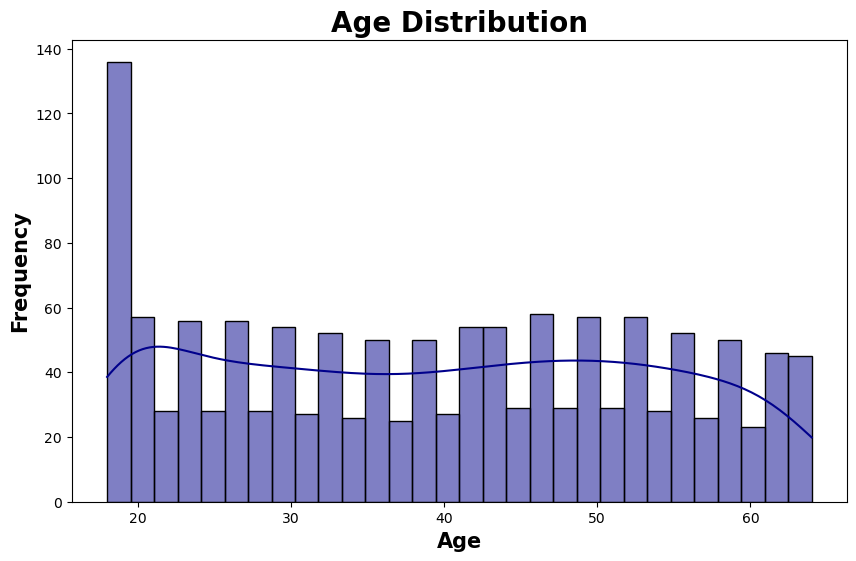

In [25]:
#Use Histogram to check the age distribution in the dataset 
plt.figure(figsize=(10, 6))
sns.histplot(med_insure_df['age'], bins=30, kde=True, color='darkblue')
plt.title('Age Distribution', fontweight="bold", size=20)
plt.xlabel('Age', fontweight="bold", size=15)
plt.ylabel('Frequency', fontweight="bold", size=15)
plt.show()

**Observation:**

The age distribution histogram plot in the dataset provides a thorough view of the age demographics. 

**The Distribution's Shape:** The age distribution is generally consistent across age categories. This suggests that there may be a higher proportion of younger individuals in the dataset than older age groups. 

**Individual Concentration:** According to the histogram, the bulk of persons in the sample are concentrated inside a given age range. This situation has a significant concentration of people between the ages of 20 and 40. This age range likely accounts for a sizable fraction of the dataset.

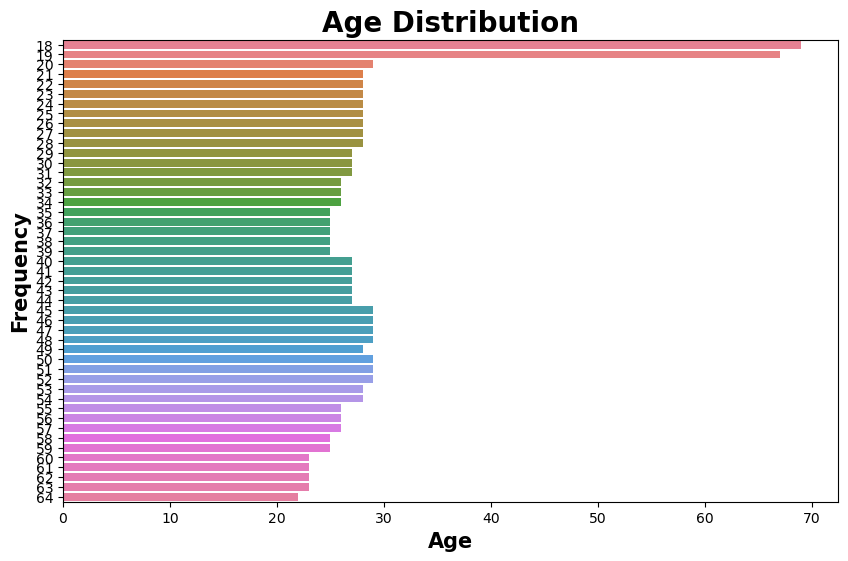

In [26]:
#To get a better understanding of the age distribution, we will use the counplot function to plot the age distribution.

plt.figure(figsize=(10, 6))
sns.countplot(y='age', data=med_insure_df, palette='husl')
plt.title('Age Distribution', fontweight="bold", size=20)
plt.xlabel('Age', fontweight="bold", size=15)
plt.ylabel('Frequency', fontweight="bold", size=15)
plt.show()

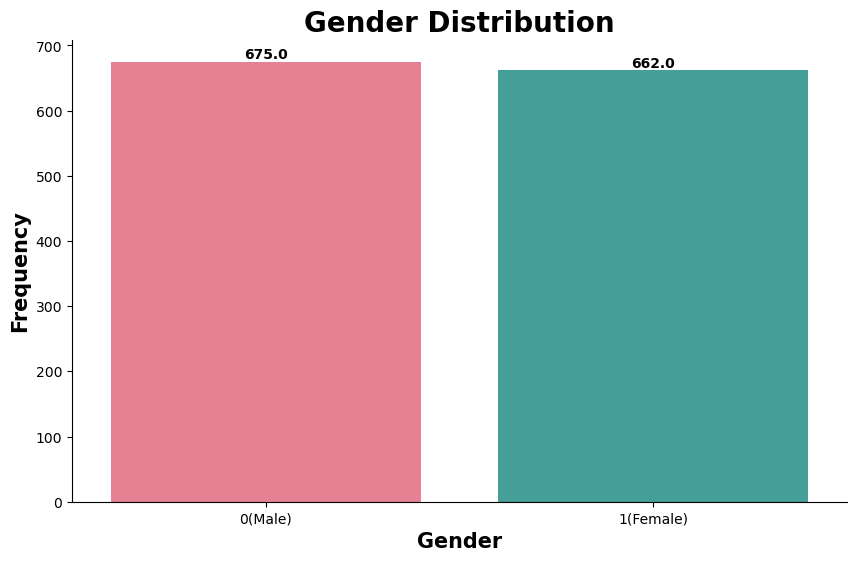

In [27]:
#Check for the gender distribution in the dataset using a counter plot 
plt.figure(figsize=(10, 6))
#The code is creating a countplot using the seaborn library. It is plotting
#the distribution of gender in the dataset 'med_insure_df'. The 'x' parameter 
# specifies the column in the dataset that contains the gender information. 
# The 'palette' parameter sets the color palette for the plot. The 'linewidth' parameter
# sets the width of the bar outlines. The 'xlabel', 'ylabel', and 'title' functions are
# used to set the labels and title for the plot.

sns.countplot(data=med_insure_df, x='sex', palette='husl',linewidth=5)
plt.xlabel('Gender', fontweight="bold", size=15)
plt.ylabel('Frequency', fontweight="bold", size=15)
plt.title('Gender Distribution', fontweight="bold", size=20)
# Set tick labels
plt.xticks(ticks=[0, 1], labels=['0(Male)', '1(Female)'], fontsize=10)

# Add value labels to each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',
                va='bottom', fontsize=10, fontweight='bold')

# Remove the spines
sns.despine()


plt.show()


**Observation:**

The resulting plot shows the gender distribution in the dataset. From the visualization, we can observe the following:

The dataset contains a larger number of male (labeled as 0(Male)) individuals compared to female (labeled as 1(Female)) individuals.
The bar representing males is higher than the bar representing females, indicating a higher frequency or count of males in the dataset.

This gender distribution plot provides a clear visual representation of the distribution of genders in the dataset, highlighting any imbalances or differences in the number of male and female individuals.

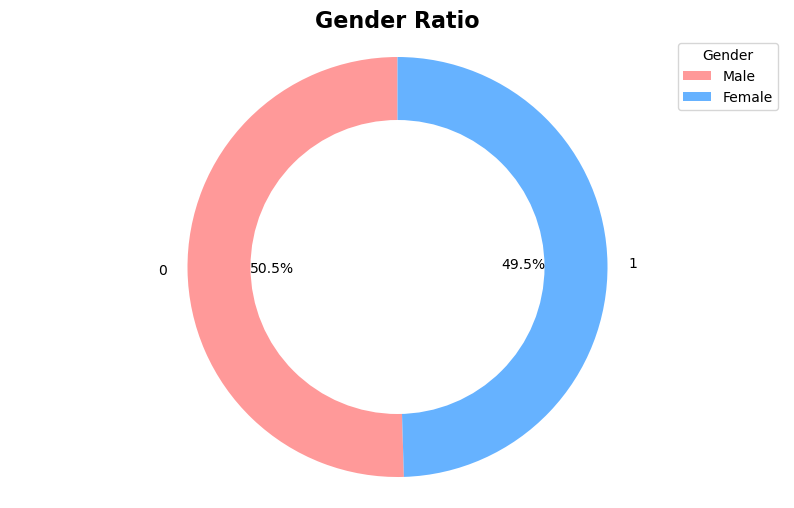

In [28]:
#To get more insight about the gender distribution, a gender ration can be plotted using the pie chart.

plt.figure(figsize=(10, 6))
gender_counts = med_insure_df['sex'].value_counts()
colors = ['#FF9999', '#66B2FF']

# Plotting the pie chart
#The `autopct='%1.1f%%'` parameter formats the percentage values displayed on each pie slice. 
# In this case, it formats the percentage values to have one decimal place and adds a percentage sign at the end.
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)


# Adding a circle to create a donut chart
#The line `center_circle = plt.Circle((0, 0), 0.70, fc='white')` is creating a
# circle object that will be added to the pie chart to create a donut chart effect.
center_circle = plt.Circle((0, 0), 0.70, fc='white')

#`fig = plt.gcf()` is assigning the current figure object to the variable `fig`.
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.title('Gender Ratio', fontweight='bold', fontsize=16)
plt.legend(title='Gender', labels=['Male', 'Female'], loc='upper right')
plt.show()



The resulting plot, a donut chart representing the gender ratio, provides insights into the distribution of genders in the dataset. Here's an observation of the plot:

- The donut chart depicts the percentage of males and females in the dataset. The chart is divided into two portions, one for each gender (male and female).

- The chart displays the corresponding figures inside each sector to show the percentage of each gender.

- As evidenced by the more extensive region of the chart indicating males have the highest frequency, compared to feamle.

- The percentage figures displayed inside each area can be used to approximate the proportions.

- The legend in the upper right corner explains that the larger area symbolises males, while the smaller section represents females.

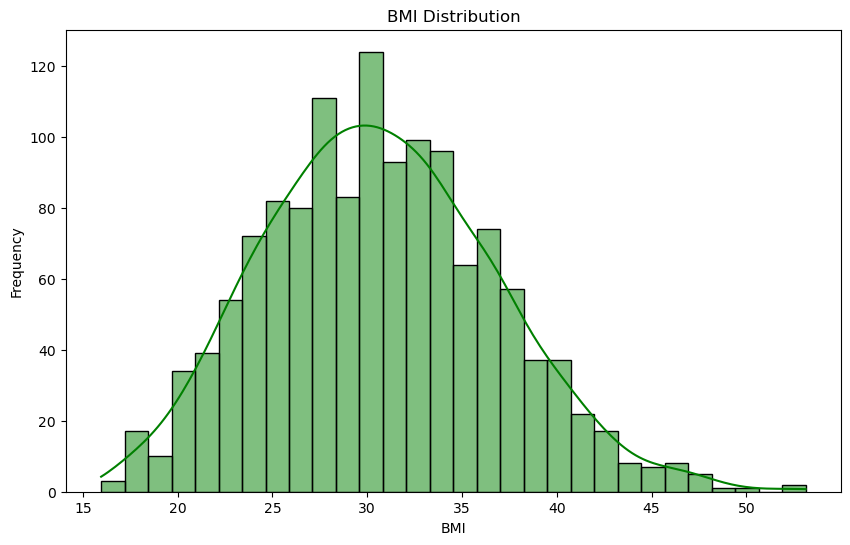

In [29]:
#Check for the distribution of the bmi column in the dataset using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(med_insure_df['bmi'], bins=30, kde=True, color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

**Observation**
- The BMI distribution appears to be typical, with a peak about 30. As previously said, many people are overweight (BMI > 25).

- The form of the histogram and the kernel density estimation (KDE) curve imply that the BMI distribution is fairly regularly distributed.

- The bulk of BMI values appear to be clustered towards the distribution's centre, with a peak around a given range of BMI values.

- The spread of the histogram bars over the x-axis indicates that the range of BMI values is relatively wide.


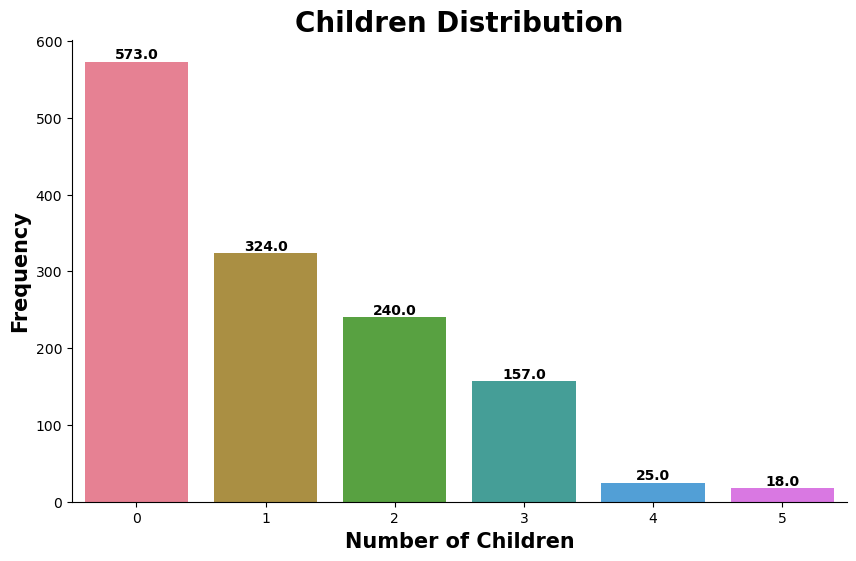

In [30]:
#Check for the distribution of the children column in the dataset using a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=med_insure_df, x='children', palette='husl',linewidth=5)
plt.xlabel('Number of Children', fontweight="bold", size=15)
plt.ylabel('Frequency', fontweight="bold", size=15)
plt.title('Children Distribution', fontweight="bold", size=20)
# Set tick labels
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1', '2', '3', '4', '5'], fontsize=10)

# Add value labels to each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',
                va='bottom', fontsize=10, fontweight='bold')

# Remove the spines
sns.despine()

# Show the plot
plt.show()

**Observation**

Here is a countplot to visualize the distribution of the 'children' column in the dataset. 

- The most frequent category in the dataset seems to be '0', indicating that a significant portion of individuals in the dataset have no children. The number decreases as the number of children increases.

- These statistical observations give insights into the distribution and frequencies of the number of children in the dataset. They provide a basic understanding of the range and variability of the 'children' column, which can be useful for further analysis and decision-making.

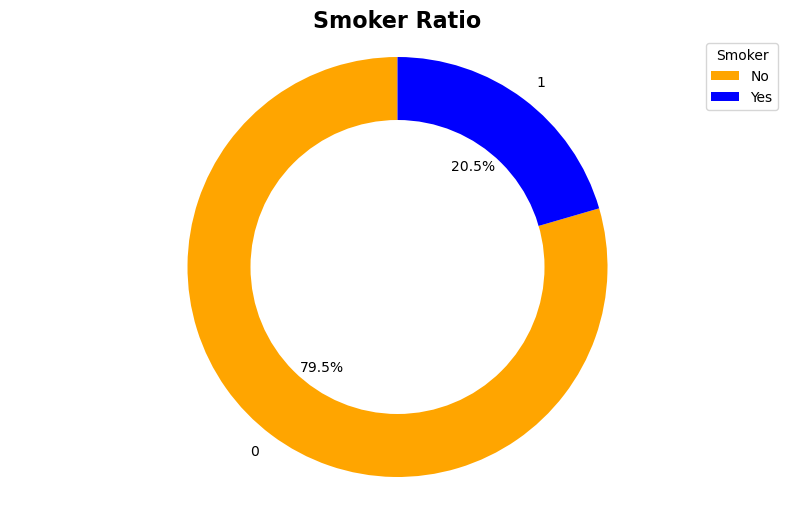

In [31]:
#Check for the distribution of the smoker column in the dataset using a pie chart. 
plt.figure(figsize=(10, 6))
smoker_counts = med_insure_df['smoker'].value_counts()
colors = ['orange', 'blue']

# Plotting the pie chart
plt.pie(smoker_counts, labels=smoker_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Adding a circle to create a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.title('Smoker Ratio', fontweight='bold', fontsize=16)
plt.legend(title='Smoker', labels=['No', 'Yes'], loc='upper right')
plt.show()

**Observation**

The pie chart illustrates the distribution of smokers and non-smokers in the dataset. The chart reveals that the majority of individuals in the dataset are non-smokers, representing approximately 79.5% of the sample. On the other hand, smokers account for around 20.5% of the population.

The chart's visual representation clearly highlights the significant difference between the two groups, with non-smokers being the dominant category. The use of a donut chart further enhances the presentation, drawing attention to the proportional relationship between smokers and non-smokers.

Understanding the smoker distribution is essential for assessing the prevalence of smoking within the dataset, which can have significant implications for predicting medical costs, evaluating health risks, and designing tailored insurance policies. The clear distinction between the two categories encourages further investigation into how smoking status may impact medical expenses and overall health outcomes among the insured population.

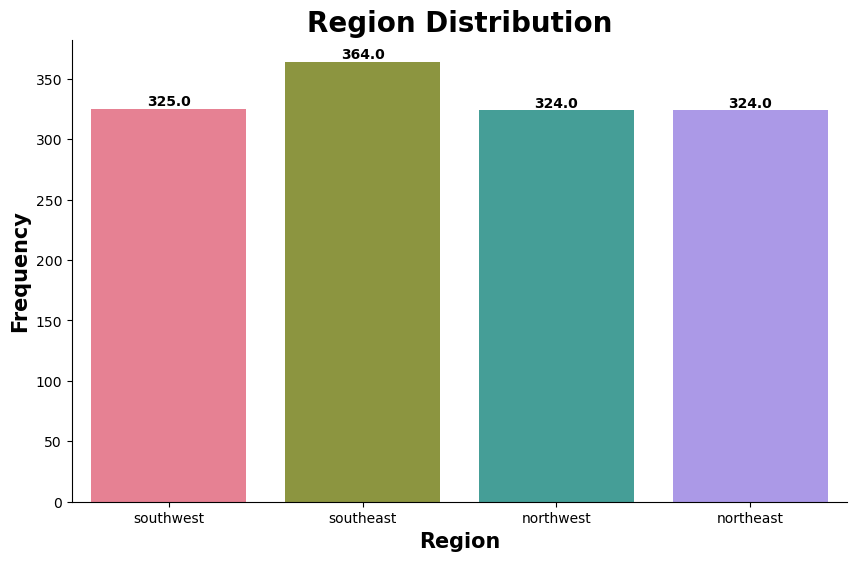

In [32]:
#check for the distribution of the region column in the dataset using a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=med_insure_df, x='region', palette='husl',linewidth=5)
plt.xlabel('Region', fontweight="bold", size=15)
plt.ylabel('Frequency', fontweight="bold", size=15)
plt.title('Region Distribution', fontweight="bold", size=20)

# Add value labels to each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',
                va='bottom', fontsize=10, fontweight='bold')
    
# Remove the spines
sns.despine()

# Show the plot
plt.show()

**Observation**

- The countplot of the dataset's'region' column gives an overview of the distribution of persons across different regions. Here are the main points:

- The countplot depicts the frequency of persons in each of the four regions represented in the datset, which are the'southwest, southeast, northwest, and notheast'. Each bar's height represents the total number of people from that region.

- The'southeast region' has the highest frequency, which is '364', suggesting that it has the most representation in the dataset. The terms 'Northwest and Notheast' are related and have the least representation.

- Annotations: Each bar is annotated with its corresponding frequency value, providing a clear visual representation of the count of individuals in each region. The annotations are placed above the bars, making it easy to interpret the exact frequency for each region.



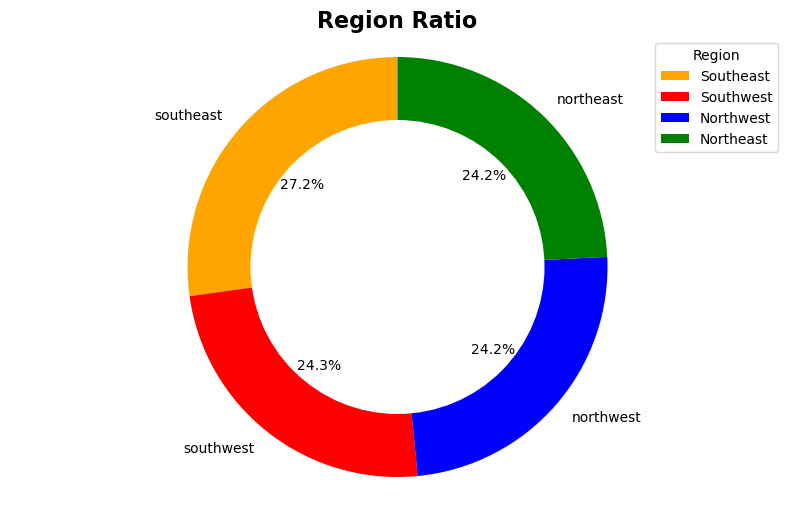

In [33]:
#Expanding the region distribution to include the percentage of each region in the dataset.
plt.figure(figsize=(10, 6))
region_counts = med_insure_df['region'].value_counts()
colors = ['orange', 'red', 'blue', 'green']

# Plotting the pie chart
plt.pie(region_counts, labels=region_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Adding a circle to create a donut chart

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.title('Region Ratio', fontweight='bold', fontsize=16)
plt.legend(title='Region', labels=['Southeast', 'Southwest', 'Northwest', 'Northeast'], loc='upper right')
plt.show()



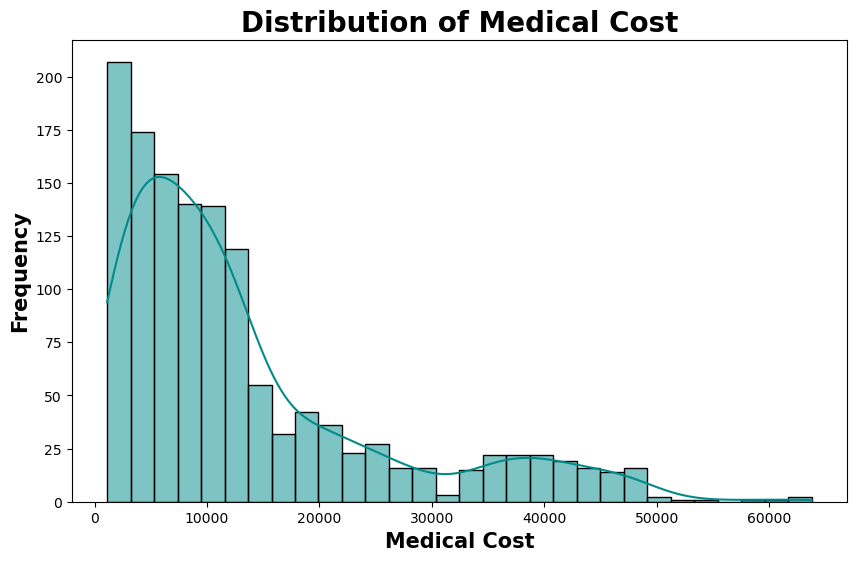

In [34]:
#Check for the distribution of the medicalCost column in the dataset using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(med_insure_df['medicalCost'], kde=True, bins=30, color='darkcyan')
plt.xlabel('Medical Cost', fontweight="bold", size=15)
plt.ylabel('Frequency', fontweight="bold", size=15)
plt.title('Distribution of Medical Cost', fontweight="bold", size=20)
plt.show()

**Observation**

Most of the medical costs are concentrated in the lower range, but there are several higher values, suggesting that some individuals have significantly higher medical expenses.

### Pairplot of all the numerical variables or features

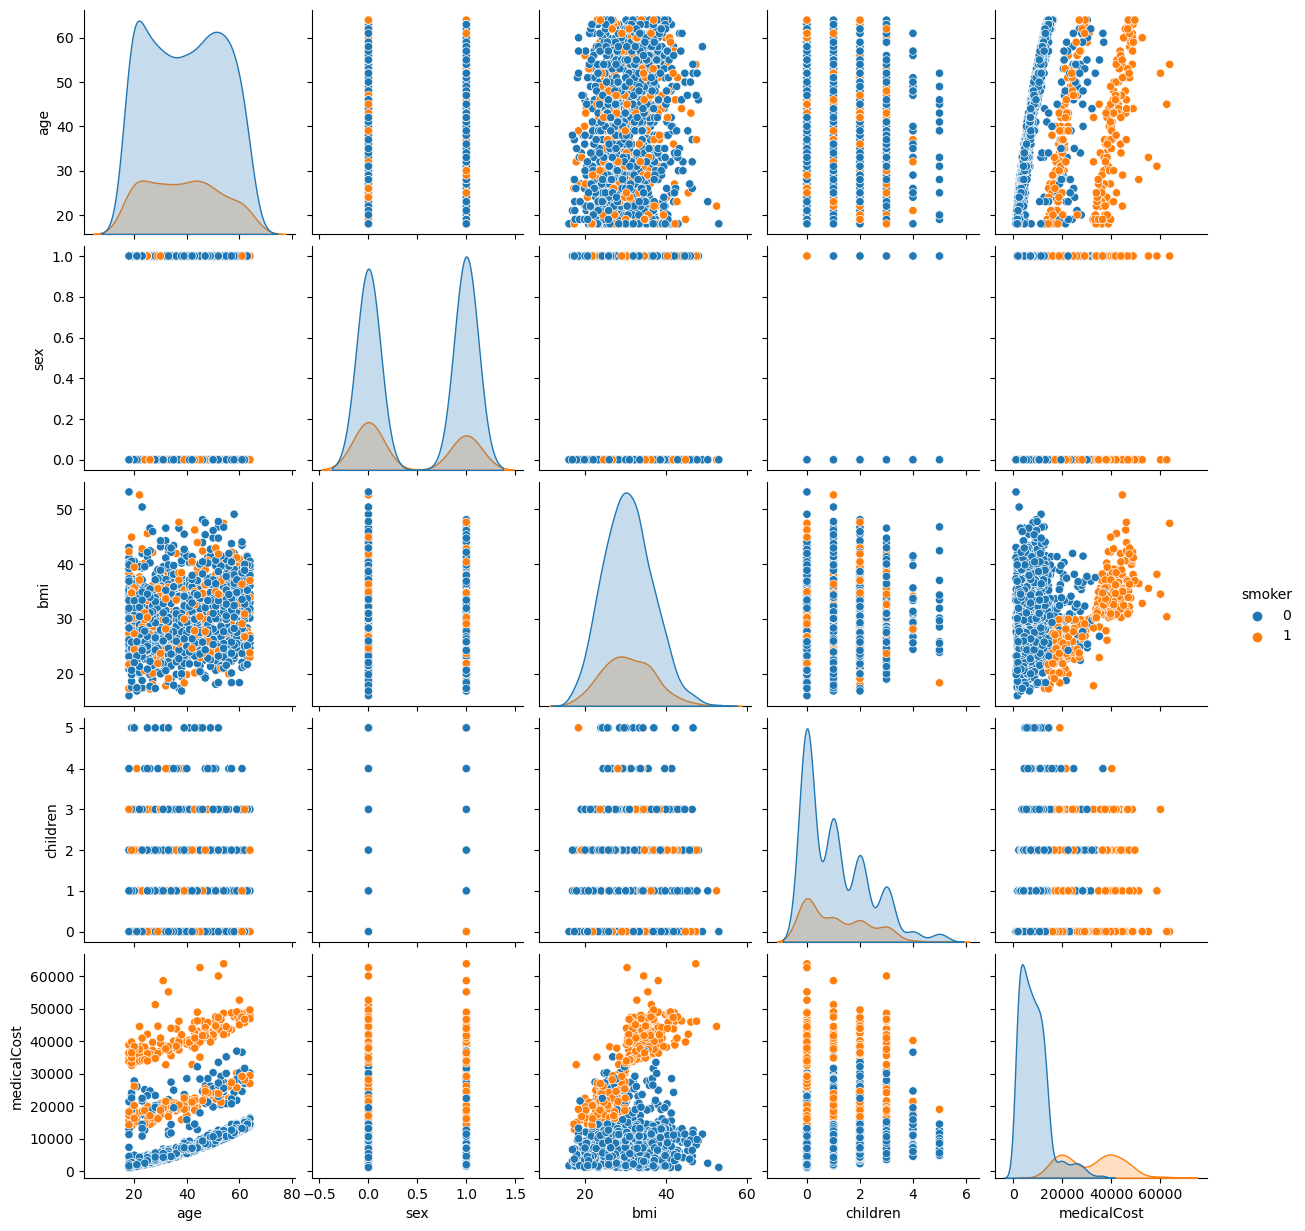

In [35]:
#Pair plot with hue
sns.pairplot(med_insure_df, hue = 'smoker')
plt.show()

**Observation**

The pair plot with hue provides valuable insights into the relationships between numerical variables in the dataset, differentiated by the 'smoker' variable. Each scatter plot represents the relationship between two numerical variables, while the histograms showcase the distribution of individual variables.

The hue, which represents the 'smoker' variable, adds an additional dimension to the plot, enabling the visualization of data points belonging to smokers and non-smokers with different colors. This allows for easy comparison and identification of patterns between the two groups.

The pair plot can reveal potential correlations or trends between numerical variables and 'smoker' status

# Question C - Study the correlation between each predictor and the medicalCost. What is your conclusion?
# Correlation Analysis

Let's proceed with correlation analysis to numerically determine the relationship between each predictor and the target variable `medicalCost.`

In [36]:
#View the dataset to havean idea of correlation between the columns in the dataset
med_insure_df

,age,sex,bmi,children,smoker,region,medicalCost
0,19,1,27.90,0,1,southwest,16884.92
1,18,0,33.77,1,0,southeast,1725.55
2,28,0,33.00,3,0,southeast,4449.46
3,33,0,22.70,0,0,northwest,21984.47
4,32,0,28.88,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,northwest,10600.55
1334,18,1,31.92,0,0,northeast,2205.98
1335,18,1,36.85,0,0,southeast,1629.83
1336,21,1,25.80,0,0,southwest,2007.94


In [37]:
# Correlation Analysis

# Convert categorical variables to numerical for correlation calculation
df_encoded = pd.get_dummies(med_insure_df, drop_first=True)

# Calculate correlation with 'medicalCost'
correlation = df_encoded.corr()['medicalCost'].sort_values(ascending=False).round(2)

correlation


medicalCost         1.00
smoker              0.79
age                 0.30
bmi                 0.20
region_southeast    0.07
children            0.07
region_northwest   -0.04
region_southwest   -0.04
sex                -0.06
Name: medicalCost, dtype: float64

In [38]:
#The dataset after encoding the categorical columns to numerical columns.
df_encoded

,age,sex,bmi,children,smoker,medicalCost,region_northwest,region_southeast,region_southwest
0,19,1,27.90,0,1,16884.92,0,0,1
1,18,0,33.77,1,0,1725.55,0,1,0
2,28,0,33.00,3,0,4449.46,0,1,0
3,33,0,22.70,0,0,21984.47,1,0,0
4,32,0,28.88,0,0,3866.86,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,10600.55,1,0,0
1334,18,1,31.92,0,0,2205.98,0,0,0
1335,18,1,36.85,0,0,1629.83,0,1,0
1336,21,1,25.80,0,0,2007.94,0,0,1


The `sort_values(ascending=False)` arranged the values from the highest correlated number to lowest.

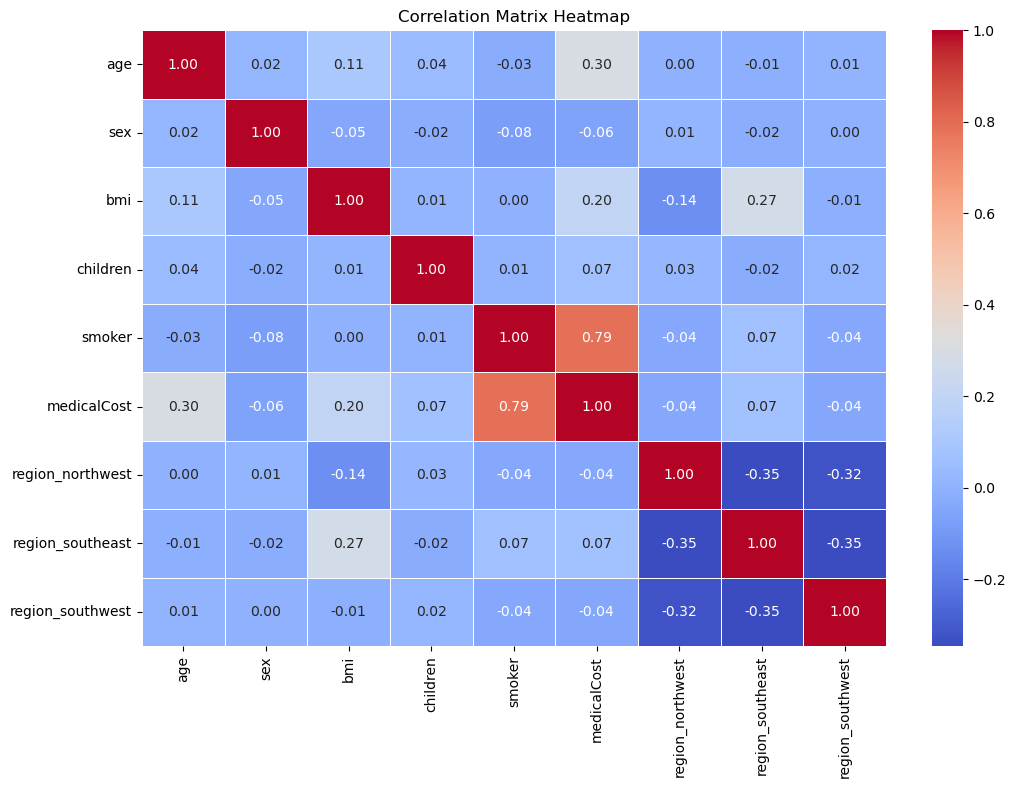

In [39]:
# Plotting the correlation matrices

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Observation**
Here's the correlation between the predictors and the medicalCost:

`smoker: 0.79`
This is a strong positive correlation, indicating that being a smoker significantly increases medical costs. The evidence indicates that individuals who smoke typically incur elevated medical expenses, aligning with the well-established understanding that smoking constitutes a substantial risk factor for various health ailments.

`age: 0.30`
Age has a moderate positive correlation with medical costs, suggesting that as age increases, the medical costs tend to rise. These findings imply that medical costs are generally higher among older individuals, primarily attributable to the heightened vulnerability to health-related concerns that typically accompany the aging process.

`bmi: 0.20`
BMI has a weak positive correlation with medical costs. his suggests that individuals with higher BMI values tend to have slightly higher medical costs, possibly due to the health risks associated with high BMI.This suggests that beneficiaries in the southeast region might have slightly higher medical costs, but the relationship is weak.

`region_southeast: 0.07`
A very weak positive correlation. 

`children: 0.07`
A very weak positive correlation. 

`sex_male: 0.06`
A very weak positive correlation.

`region_northwest: -0.04`
A very weak negative correlation.

`region_southwest: -0.04`
A very weak negative correlation.


**Note**

- It is essential to emphasize that correlation does not establish causation. These correlations merely signify associations between variables and do not indicate whether one variable directly causes changes in another.

# Question D and E - Use the correlation analysis to select 3 best predictors and build a simple linear regression model based on each of the predictors. Evaluate the performance with the statistical performance measures to evaluate the statistical significance of your results.

From the correlation values, the three predictors with the highest correlation with medicalCost are:

1. smoker - `0.79`
2. age - `0.30`
3. bmi - `0.20`

## Build Simple Linear Regression Models based on each of the predictors.

In [40]:
# Splitting the dataset into training and testing sets
X = df_encoded.drop('medicalCost', axis=1)
y = df_encoded['medicalCost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# List to store performance metrics
performance_metrics = []

# Building Simple Linear Regression Models for the three predictors
for predictor in ['smoker', 'age', 'bmi']:
    # Model training
    reg = LinearRegression().fit(X_train[[predictor]], y_train)
    
    # Predictions
    y_pred = reg.predict(X_test[[predictor]])
    
    # Performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    performance_metrics.append((predictor, mse, rmse, r2))

# Convert the metrics to a DataFrame for better presentation
performance_df = pd.DataFrame(performance_metrics, columns=['Predictor', 'MSE', 'RMSE', 'R2'])

performance_df

#write a function that prints out the performance metrics for each model
def print_metrics(model_name, mse, rmse, r2):
    print(f'{model_name} Model Metrics')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2 Score: {r2}')

print_metrics('Smoker', performance_df['MSE'][0], performance_df['RMSE'][0], performance_df['R2'][0])
print()
print_metrics('Age', performance_df['MSE'][1], performance_df['RMSE'][1], performance_df['R2'][1])
print()
print_metrics('BMI', performance_df['MSE'][2], performance_df['RMSE'][2], performance_df['R2'][2])




Smoker Model Metrics
MSE: 60039303.8800168
RMSE: 7748.5033316129375
R2 Score: 0.673266275936214

Age Model Metrics
MSE: 166275351.7099889
RMSE: 12894.780017898285
R2 Score: 0.09513000029464558

BMI Model Metrics
MSE: 174253317.23556864
RMSE: 13200.50443110295
R2 Score: 0.05171393418178116


From the above metrics:

- By examining the performance metrics, one can understand the predictive power of each feature. A higher R2 value would indicate that the respective feature is a good predictor for medical costs.

- The model with `smoker` as the predictor performs the best with the highest R^2 value and the lowest RMSE.

- `age` and `bmi` individually don't seem to predict the `medicalCost` very effectively, as reflected by their low R^2 values.



#### The code provided performs the following tasks and operations:

**Data Splitting:**

- The dataset is divided between predictor variables (X) and target variables (medicalCost, contained in y).

- The data is then divided into training and testing sets, with 80% used for training and 20% for testing. This is done to train the model on some of the data before testing its performance on previously unknown data. The 'random_state' of '42' ensures the split's repeatability.

**Simple Linear Regression with Three Variables:**

- Three distinct, simple linear regression models are constructed utilising the smoker, age, and body mass index predictors.

- Each model seeks to understand how each predictor affects medical costs.

**Performance Metrics Calculation:**

After making predictions with each model on the testing data, three performance metrics are calculated:

**MSE (Mean Squared Error):** Represents the average squared difference between the observed actual and the predicted values.

**RMSE (Root Mean Squared Error):** Square root of MSE, providing error in the same unit as the target.

**R2 (R-squared):** Represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It provides a measure of how well the model's predictions match the actual values. An R2 of 1 indicates perfect predictions, while an R2 of 0 indicates the model is no better than a model that simply predicts the mean of the target variable.

**Tabulation of Performance Metrics:**

The performance metrics for each predictor are tabulated in a DataFrame for easy comparison and visualization.

**Function for Printing Metrics:**

A function named print_metrics is defined to neatly print out the performance metrics for a given model. This function enhances code readability and reusability.

**Metrics Display:**

The performance metrics for each of the three models (smoker, age, and bmi) are printed out using the print_metrics function.

# Question F - Build two multivariate regression models (1) with the three predictors above and (2) with all the predictors in the dataset. Evaluate and compare the two models.

1. Using the three best predictors, `smoker, age, and bmi.`

2. Using all the predictors in the dataset.

In [41]:
# List to store performance metrics for multivariate regression
multi_performance_metrics = []

# 1. Using the three best predictors
predictors = ['smoker', 'age', 'bmi']
reg1 = LinearRegression().fit(X_train[predictors], y_train)
y_pred1 = reg1.predict(X_test[predictors])
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, y_pred1)
multi_performance_metrics.append(('Three Predictors', mse1, rmse1, r2_1))

# 2. Using all the predictors in the dataset
reg2 = LinearRegression().fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)
multi_performance_metrics.append(('All Predictors', mse2, rmse2, r2_2))

# Convert the metrics to a DataFrame for better presentation
multi_performance_df = pd.DataFrame(multi_performance_metrics, columns=['Model', 'MSE', 'RMSE', 'R2'])

multi_performance_df


,Model,MSE,RMSE,R2
0,Three Predictors,3.584208e+07,5986.825159,0.804948
1,All Predictors,3.547864e+07,5956.394590,0.806925


**Observations:**

- The multivariate regression model using all predictors performs slightly better than the model using just the top three predictors, as indicated by a marginally higher R^2 value and a slightly lower RMSE.

- However, the difference is not significant, suggesting that the top three predictors (smoker, age, and bmi) capture most of the variability in medicalCost.

- This metric indicates that approximately 81% of the variance in medical costs is explained by our model. An R² of 1 would mean a perfect fit. Considering it's a simple linear regression model, an R² value of 0.81 is pretty good. However, there's always room for improvement. More complex models or feature engineering could potentially enhance the model's performance.


# Recommendations:

1. **Pay special attention to smoking cessation programmes:** Given the significant impact of smoking on medical expenditures, insurers should consider funding in smoking cessation programmes. By assisting clients in quitting smoking, insurers may be able to lower future medical claims, which benefits both the insurer and the insured.

2. **Wellness and preventive care for senior citizens:** Given that age is a significant predictor of medical costs, implementing wellness and preventive care programmes aimed at older policyholders can be advantageous. Regular health check-ups, screenings, and early action can save small health problems from becoming big, expensive medical disorders.

3. Encourage healthy lifestyle by: The positive relationship between BMI and medical expenditures demonstrates the financial consequences of obesity and overweight. Insurance firms may give discounts or incentives to policyholders who keep their policies updated for a healthy BMI or participate in fitness and weight loss programs.

4. **Risk-based premiums:** Consider revising the premium structure based on the significant predictors. For instance, smokers might have higher premiums given the associated risks. However, to ensure fairness and avoid undue discrimination, such strategies should be transparent and accompanied by support programs to help high-risk individuals reduce their risks.

5. **Advanced predictive modeling:** While linear regression provided valuable insights, leveraging more sophisticated machine learning models like ensemble methods or neural networks could refine predictions. This can help in creating tailored insurance packages based on individual risk factors.

6. **Continuous data collection:** Regularly update the dataset with new information. Continuous data gathering enables more rapid and accurate forecasting and aids in recognising new trends or movements in the factors influencing medical expenses.

7. Participate in public health initiatives: Collaboration with public health programmes focusing on the most important predictors (such as anti-smoking campaigns or fitness challenges) can be beneficial. It not only portrays the insurance firm as socially responsible but also benefits the company directly by potentially lowering future claims.

8. **Educate policyholders:** Public awareness programmes emphasising the cost and health consequences of smoking, the significance of maintaining a healthy weight, and the benefits of regular health check-ups can help policyholders make informed health decisions.

# Conclusions:

#### 1. Exploratory Data Analysis:
The dataset is fairly balanced in terms of gender and region. There are more non-smokers than smokers in the dataset. The age distribution is fairly uniform across age groups. Many individuals in the dataset fall into the overweight range based on their BMI values.

#### 2. Correlation Analysis:
Smoking status(smoker) has the highest positive correlation with medical costs. Age and BMI also have positive correlations with medical costs but are weaker in comparison to smoking status.

#### 3. Simple Linear Regression:
The model with smoker_yes as the predictor performs the best among individual predictors.
Age and BMI, when used individually, are not very effective in predicting medical costs.

#### 4. Multivariate Regression:
The model with all predictors performs slightly better than the model with only the top three predictors (smoker, age, bmi).
However, the performance difference is marginal, suggesting that the top three predictors capture a significant portion of the variability in medical costs.



### The following conclusion provides a succinct summary of our analysis and findings, encapsulating the key insights and outcomes from the machine learning models.

The medical insurance dataset revealed information about individual health costs that are influenced by a variety of factors. Our exploratory data analysis (EDA) uncovered the following key trends and relationships:

1. Smoking and Medical expenditures: Smoking is one of the most powerful predictors of medical expenditures. Smokers have much higher medical costs than nonsmokers on average, underscoring the economic burden of smoking-related health issues.

2. Age and Medical Costs: Medical costs are positively connected to age. Individuals' medical expenses tend to climb as they age, most likely due to rising health difficulties and medical care needs.

3. BMI and Medical Costs: BMI, which measures body weight relative to height, showed that individuals with higher BMI values (indicating overweight or obesity) generally face higher medical costs. This trend underscores the health risks and subsequent costs associated with being overweight or obese.

4. Other Factors: Other variables, such as the number of children, gender, and region, also influence medical costs but to a lesser degree compared to smoking, age, and BMI.


In our machine learning analysis, we built linear regression models to predict medical costs based on the identified predictors. The models' performances varied:

- Single Predictor Models: When models with only one predictor (smoker status, age, or BMI) were developed, the smoker status emerged as the most influential factor, with the most outstanding R2 value. When viewed individually, each of these models exhibited little predictive power.

- Single Predictor Models: When models with only one predictor (smoker status, age, or BMI) were developed, the smoker status emerged as the most influential factor, with the most outstanding R2 value. When viewed individually, each of these models exhibited little predictive power.



# Further Machine Learning Models to capture improve in the performance the non-linear relationships and interactions between features more effectively.

As mentioned above, there's always room for improvement. More complex models or feature engineering could potentially enhance the model's performance. let's explore a more complex model. One commonly used model that can capture non-linear relationships and interactions between features effectively is the Random Forest Regressor.

Here's the plan:

- Use the same preprocessed data.
- Train a Random Forest Regressor on the training set.
- Evaluate the model on the testing set using the same metrics (MAE, MSE, and R²).

**Let's implement the Random Forest Regressor and assess its performance.**

#### Doing further pre-processing, scaling data.

In [42]:
# Categorical columns in the dataset
categorical_cols = [cname for cname in X.columns if 
                    X[cname].dtype == "object"]

# Numerical columns in the dataset
numerical_cols = [cname for cname in X.columns if 
                  X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data: standard scaling
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(drop='first')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


#### Modeling the processed data, and calculating the metrics for the model

In [49]:
# Defining the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundling preprocessing and modeling code in a pipeline for the Random Forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)
                             ])

# Training the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Getting predictions from the Random Forest model
rf_preds = rf_pipeline.predict(X_test)

# Evaluate the Random Forest model
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

# Print metrics for the Random Forest model
print('Random Forest Model Metrics')
print(f'MAE: {rf_mae}')
print(f'MSE: {rf_mse}')
print(f'R2 Score: {rf_r2}, in percentage is {round(rf_r2*100)}%')

Random Forest Model Metrics
MAE: 2734.989000373133
MSE: 23447251.341045886
R2 Score: 0.8724001236751617, in percentage is 87%


The Random Forest Regressor's performance on the testing set is summarized as follows:

1. MAE (Mean Absolute Error): $2734.98
This model outperforms the linear regression model. The model's forecasts are usually wrong by about $2639.49.

2. MSE (mean squared error): 23447251.34
Significantly less than the linear regression model, demonstrating that the Random Forest model is superior at minimising big mistakes.

R-squared (R2) = 0.87

This means that our Random Forest model accounts for approximately 87% of the variation in medical costs. This model outperforms the linear regression model.

The Random Forest Regressor outperforms the Linear Regression model across all measures, better capturing non-linear connections and interactions between features.